# <center>Travel Project - Progetto finale Data Science (start2Impact University)</center>

<img src="https://media-cldnry.s-nbcnews.com/image/upload/rockcms/2021-11/211111-laguardia-airport-al-0800-795dd4.jpg" />

## Table of Contents:
* [1. Introduzione](#first-bullet)
* [2. Exploratory data analysis (EDA)](#second-bullet)
* [3. Preprocessing, Detecting Outliers e Best Feature Selection](#third-bullet)
* [4. Scelta delle metriche](#fourth-bullet)
* [5. Machine Learning con tutte le features](#fifth-bullet)
* [6. Machine Learning con "best features"](#sixth-bullet)
* [7. Valutazioni finali](#seventh-bullet)

## 1. Introduzione <a class="anchor" id="first-bullet"></a>

Dato questo dataset relativo ai clienti di una compagnia aerea, lo scopo principale del progetto è quello di predirre la soddisfazione di un cliente (se soddisfatto del servizio o meno) tramite diverse variabili che qui sotto elenco e spiego. Si tratta di un lavoro molto interessante e utile per andare a comprendere quali sono i punti in cui le compagnie aeree dovrebbero puntare di più per ottenere clienti più soddisfatti.

### 1.1. Riassunto features/target

Queste le variabili del nostro dataset con una piccola spiegazione di cosa rappresentano, l'ultima è la variabile 'target' da predirre.

1. **Gender:** maschio o femmina
2. **Customer type:** cliente fidelizzato o non fidelizzato
3. **Age:** l'età del cliente
4. **Type of travel:** il tipo di viaggio (personale o per lavoro)
5. **Class:** la classe del viaggio (Eco, Business, Eco plus)
6. **Flight distance**: la distanza del volo
7. **Inflight wifi service:** livello di soddisfazione del servizio wifi a bordo (voto da 0 a 5)
8. **Departure/Arrival time convenient:** livello di soddisfazione dell'orario di partenza/arrivo (voto da 0 a 5)
9. **Ease of Online booking:** facilità di prenotazione online (voto da 0 a 5)
10. **Gate location:** posizione del gate (voto da 0 a 5)
11. **Food and drink:** voto al mangiare e bere (voto da 0 a 5)
12. **Online boarding:** check-in online (voto da 0 a 5)
13. **Seat comfort:** comodità dei posti (voto da 0 a 5)
14. **Inflight entertainment:** intrattenimento a bordo (voto da 0 a 5)
15. **On-board service:** servizi a bordo (voto da 0 a 5)
16. **Leg room service:** spazio per le gambe (voto da 0 a 5)
17. **Baggage handling:** imbarco bagagli (voto da 0 a 5)
18. **Checkin service:** checkin service (voto da 0 a 5)
19. **Inflight service:** servizi a bordo (voto da 0 a 5)
20. **Cleanliness:** pulizia (voto da 0 a 5)
21. **Departure delay in minutes**: Minuti di ritardo alla partenza
22. **Arrival delay in minutes**: Minuti di ritardo all'arrivo
23. ***satisfaction***: la variabile 'target' da predirre, due classi: *neutral or dissatisfied* e *satisfied*

### 1.2. Import librerie

In [2]:
#Importo le librerie che mi servono
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import zip_longest
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import roc_curve, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import time

### 1.3. Import e studio dataset

In [3]:
#Importo il dataset già diviso in train e test
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

Il dataset è già separato in train e test, li terrò separati fino alla fine, man mano decido cosa applicare sull'uno, sull'altro o su entrambi.

In [4]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
df_train.shape,df_test.shape

((103904, 25), (25976, 25))

In [7]:
#guardo le info del df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
#Guardo le info del df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Dalle info emerge che le colonne di tipo "object" sono quelle categoriche binarie e qualitative (oltre al target 'satisfaction').

In [9]:
#Elimino le colonne 'Unnamed: 0' e 'id' perchè inutili al fine di qualsiasi analisi/predizione
df_train.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_test.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [10]:
#Controllo i valori nulli
df_train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [11]:
df_test.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

Solo la colonna 'Arrival Delay in Minutes' presenta dei NaN, in proporzione non sono tantissimi, voglio quindi fare l'analisi prima di decidere come agire.

## 2. Exploratory data analysis (EDA) <a class="anchor" id="second-bullet"></a>

In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [13]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,25976.0,39.620958,15.135685,7.0,27.0,40.0,51.0,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25976.0,3.046812,1.533371,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.0,3.0,4.0,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.0,3.0,4.0,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.0,3.0,4.0,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.0,4.0,4.0,5.0
Seat comfort,25976.0,3.449222,1.320090,1.0,2.0,4.0,5.0,5.0
Inflight entertainment,25976.0,3.357753,1.338299,0.0,2.0,4.0,4.0,5.0


Le variabili *Departure Delay in Minutes* e *Arrival Delay in Minutes* hanno un range molto ampio ma vedendo la media 14 la maggior parte dei valori sono probabilmente concentrati in un range piccolo. I valori delle variabili categoriche ordinali sembrano in linea di massima abbastanza simili nella loro distribuzione.

In [14]:
#Manualmente "catalogo" le features
bin_features = ['Gender', 'Customer Type', 'Type of Travel']
qua_features = ['Class']
ord_features = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
                'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
num_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

print(f"Le variabili categoriali binarie sono {len(bin_features)}: {bin_features}")

print(f"\nLe variabili categoriche qualitative sono {len(qua_features)}: {qua_features}")

print(f"\nLe variabili categoriche ordinali sono {len(ord_features)}: {ord_features}")

print(f"\nLe variabili numeriche sono {len(num_features)}: {num_features}")

Le variabili categoriali binarie sono 3: ['Gender', 'Customer Type', 'Type of Travel']

Le variabili categoriche qualitative sono 1: ['Class']

Le variabili categoriche ordinali sono 14: ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

Le variabili numeriche sono 4: ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


Counter({'neutral or dissatisfied': 58879, 'satisfied': 45025})


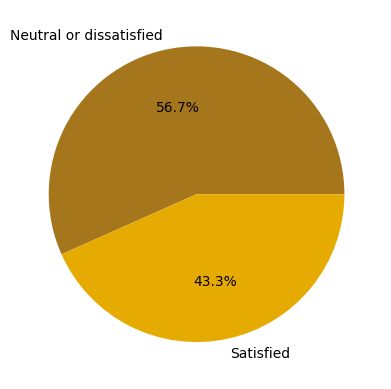

In [15]:
#Analizzo la distribuzione delle classi da predirre
plt.pie(df_train.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Dark2_r"), autopct = '%1.1f%%')
pass
print(Counter(df_train['satisfaction']))

Le due classi sono abbastanza bilanciate.

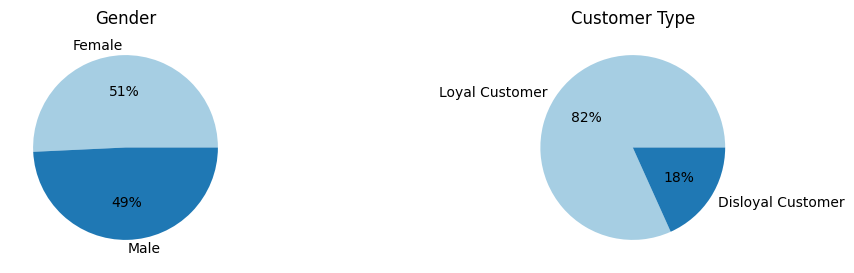

Counter({'Female': 52727, 'Male': 51177})
Counter({'Loyal Customer': 84923, 'disloyal Customer': 18981})


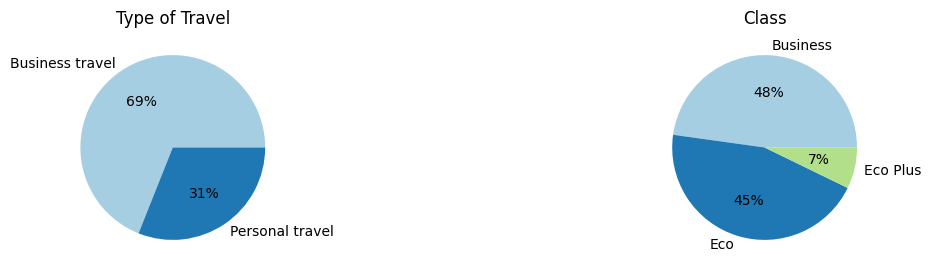

Counter({'Business travel': 71655, 'Personal Travel': 32249})
Counter({'Business': 49665, 'Eco': 46745, 'Eco Plus': 7494})


In [16]:
#Analizzo come sono "distribuite" le variabili categoriche non ordinali
fig, axes = plt.subplots(1, 2,  figsize=(12, 3))
ax1 = plt.subplot2grid((1,2),(0,0))
colors = sns.color_palette('Paired')[0:3]
plt.pie(df_train['Gender'].value_counts(), labels = ['Female', 'Male'], colors = colors, autopct='%.0f%%')
plt.title('Gender')

ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(df_train['Customer Type'].value_counts(), labels = ['Loyal Customer', 'Disloyal Customer'], colors = colors, autopct='%.0f%%')
plt.title('Customer Type')
plt.show()

print(Counter(df_train['Gender']))
print(Counter(df_train['Customer Type']))

fig, axes = plt.subplots(1, 2,  figsize=(14, 3))
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(df_train['Type of Travel'].value_counts(), labels = ['Business travel', 'Personal travel'], colors = colors, autopct='%.0f%%')
plt.title('Type of Travel')

ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(df_train['Class'].value_counts(), labels = ['Business', 'Eco', 'Eco Plus'], colors = colors, autopct='%.0f%%')
plt.title('Class')
plt.show()

print(Counter(df_train['Type of Travel']))
print(Counter(df_train['Class']))

I clienti sono più o meno divisi ugualmente tra maschi e femmine.
<br>I clienti fidelizzati sono molti di più dei non fidelizzati.
<br>I clienti che viaggiano per lavoro sono di più di quelli che viaggiano a livello personale.
<br>Per quanto riguarda la classe, chi viaggia in Eco Plus è in netta minoranza rispetto a chi viaggia in Business e Eco.

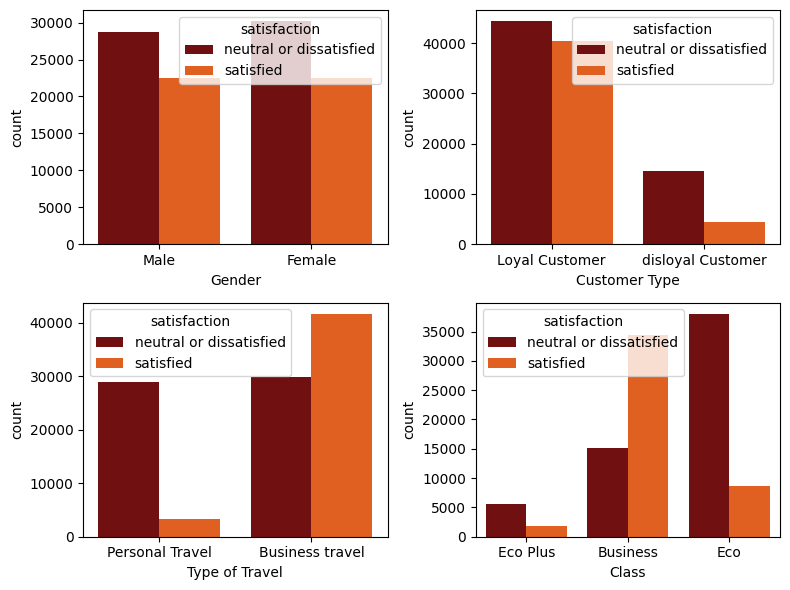

In [17]:
#Plotto come sono distribuite le due classi nelle variabili categoriche non ordinali
others = [k for k in bin_features+qua_features]
ncols = 2
nrows = int(np.ceil(len(others) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3*nrows))
for ax, col in zip_longest(axes.ravel(), others):
    if col is None:
        fig.delaxes(ax)
    else:
        sns.countplot(data=df_train, x=col, hue='satisfaction', palette='gist_heat', ax=ax)
fig.tight_layout()

Da questi grafici ricaviamo i primi insights del dataset per capire com'è strutturato e cosa incide di più su un cliente soddisfatto o meno:

da questi dati possiamo vedere che il sesso non sembra incidere molto sulla soddisfazione di un cliente (leggermente meno soddisfatte le donne). Un cliente fidelizzato è molto più soddisfatto di uno non fidelizzato. Chi viaggia per lavoro è decisamente più soddisfatto di chi viaggia per motivi personali. Chi viaggia in Business Class tendenzialmente è nettamente più soddisfatto di chi viaggia nelle altre due classi.

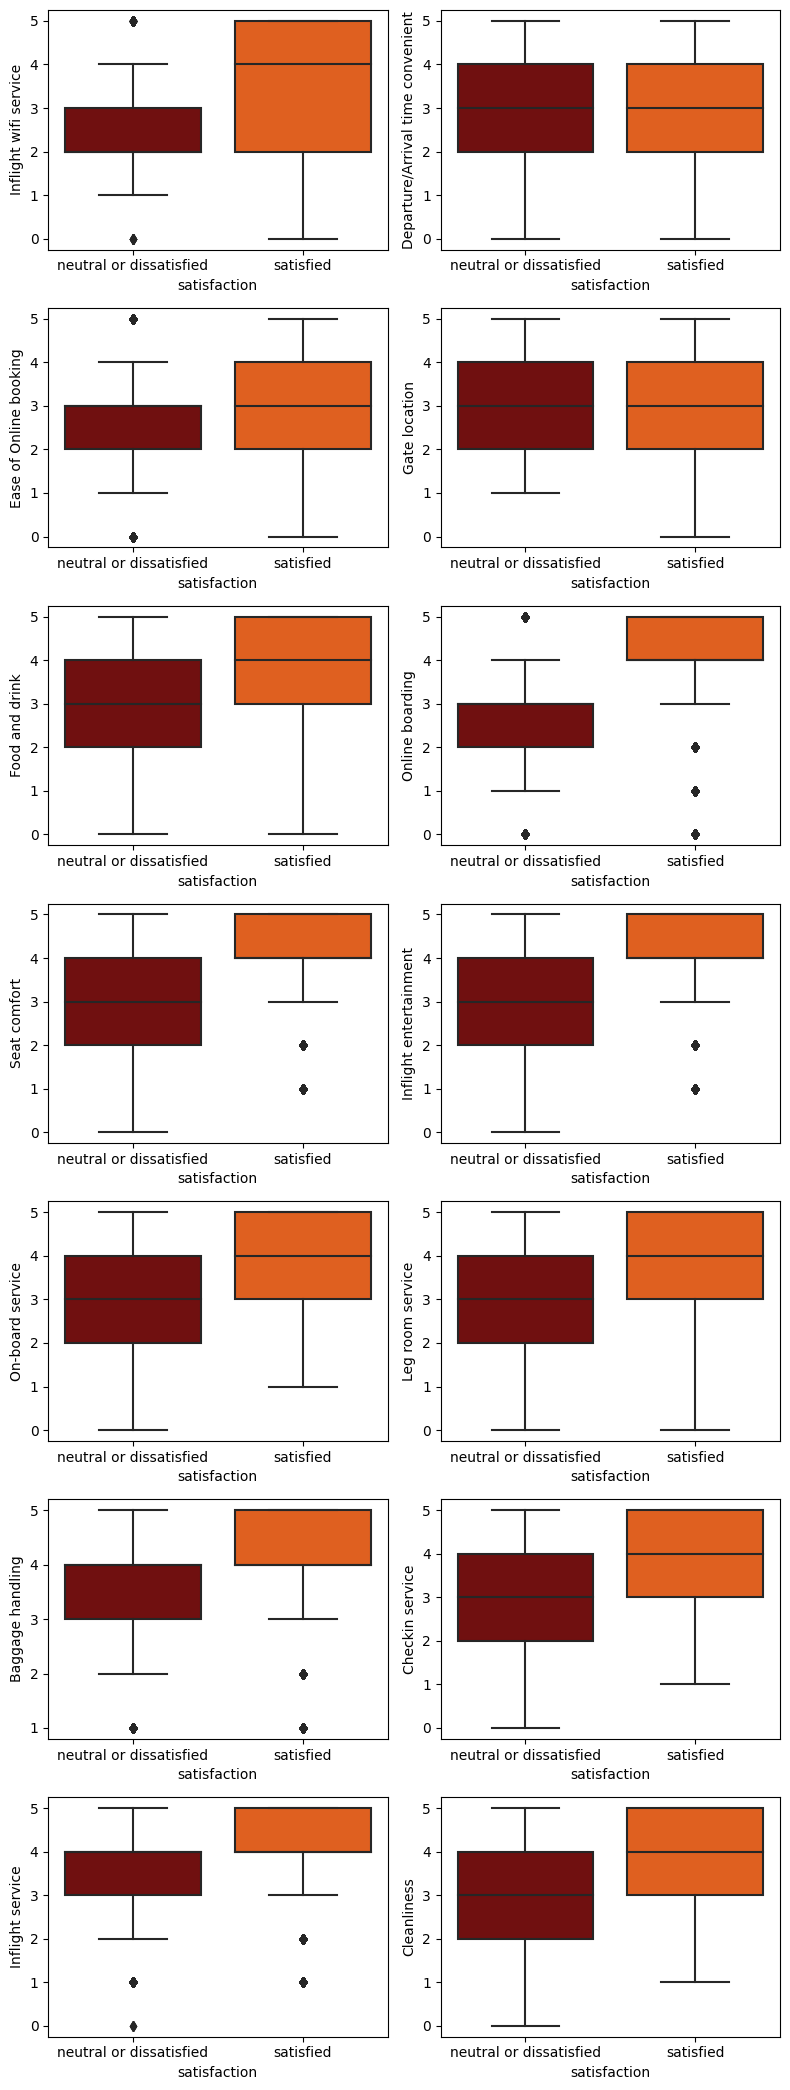

In [18]:
#Plotto come sono distribuite le due classi nelle variabili categoriche ordinali
others = [k for k in ord_features]
ncols = 2
nrows = int(np.ceil(len(others) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3*nrows))
for ax, col in zip_longest(axes.ravel(), others):
    if col is None:
        fig.delaxes(ax)
    else:
        sns.boxplot(data=df_train, x='satisfaction',y=col, palette='gist_heat', ax=ax)
fig.tight_layout()

Di base si può dire che come intuibile chi dà voti alti ai vari servizi alla fine è anche più soddisfatto. Ma ovviamente bisogna andare più nel dettaglio. *Online boarding*, *Inflight Entertainment*, *Seat Comfort* sembrano le feature più rilevanti nella soddisfazione del cliente. Quelle che sembrano influire poco e niente sono *Departure/Arrival time convenient* e *Gate location*.

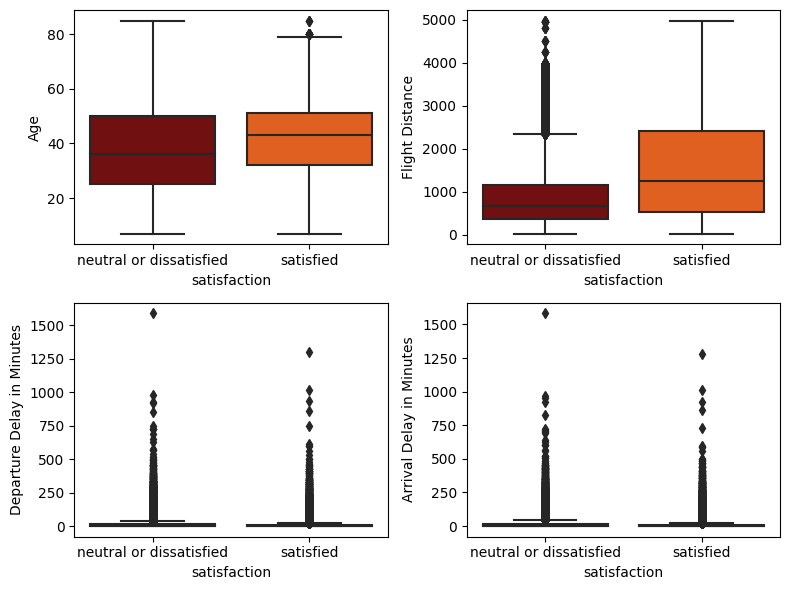

In [19]:
#Plotto come sono distribuite le due classi nelle variabili numeriche
others = [k for k in num_features]
ncols = 2
nrows = int(np.ceil(len(others) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3*nrows))
for ax, col in zip_longest(axes.ravel(), others):
    if col is None:
        fig.delaxes(ax)
    else:
        sns.boxplot(data=df_train, x='satisfaction', y=col, palette='gist_heat', ax=ax,orient='v')
fig.tight_layout()

Purtroppo i boxplot sui ritardi non sono comprensibili, evidentemente sono presenti moltissimi outliers, vedremo meglio questi dati nel prossimo grafico. L'età non incide più di tanto, i soddisfatti sono leggermente più grandi in media. Chi fa viaggi più lunghi è invece più portato ad essere più soddisfatto. Provando a fare un ipotesi, forse perchè i viaggi più lunghi dispongono di servizi migliori?

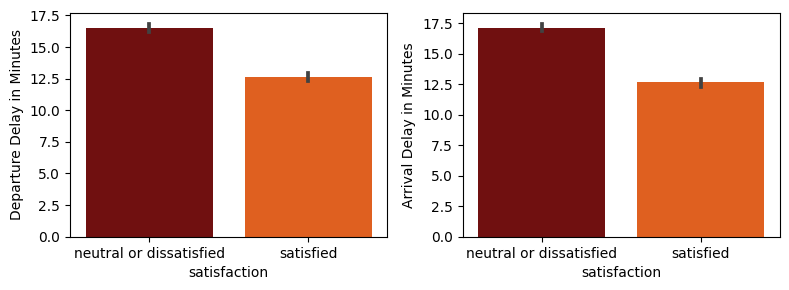

In [20]:
#Distribuzione dei ritardi
others = [k for k in num_features[-2:]]
ncols = 2
nrows = int(np.ceil(len(others) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3*nrows))
for ax, col in zip_longest(axes.ravel(), others):
    if col is None:
        fig.delaxes(ax)
    else:
        sns.barplot(data=df_train, x='satisfaction', y=col, palette='gist_heat', ax=ax,orient='v')
fig.tight_layout()

Dal grafico come si poteva prevedere a ritardi più grandi sia alla partenza che all'arrivo corrispondono clienti più insoddisfatti o neutrali.

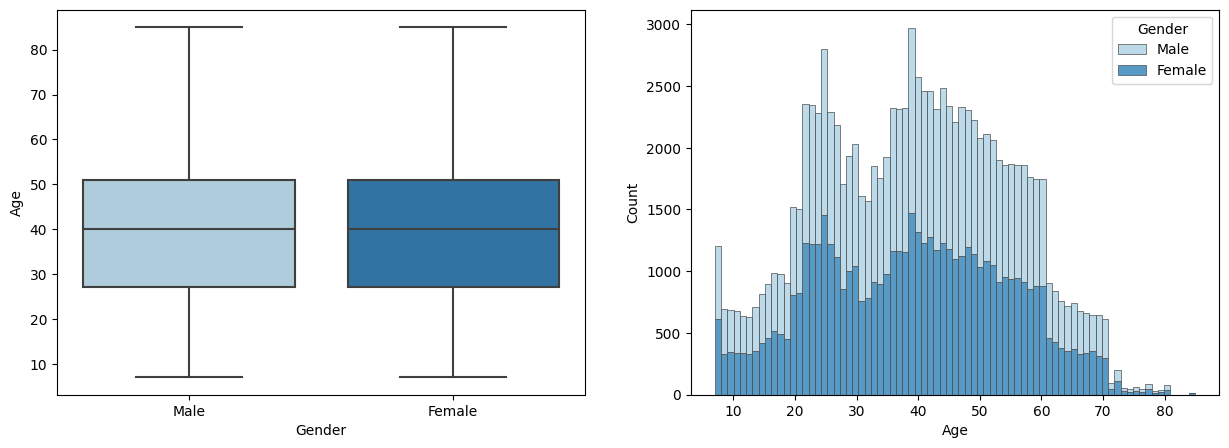

In [21]:
#Plotto la distribuzione delle variabili numeriche nelle variabili categoriche
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Gender", y = "Age", palette = 'Paired', data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Age", hue = "Gender", multiple = "stack", palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Non c'è nessuna differenza di età in relazione al sesso dei clienti. Praticamente uguale.

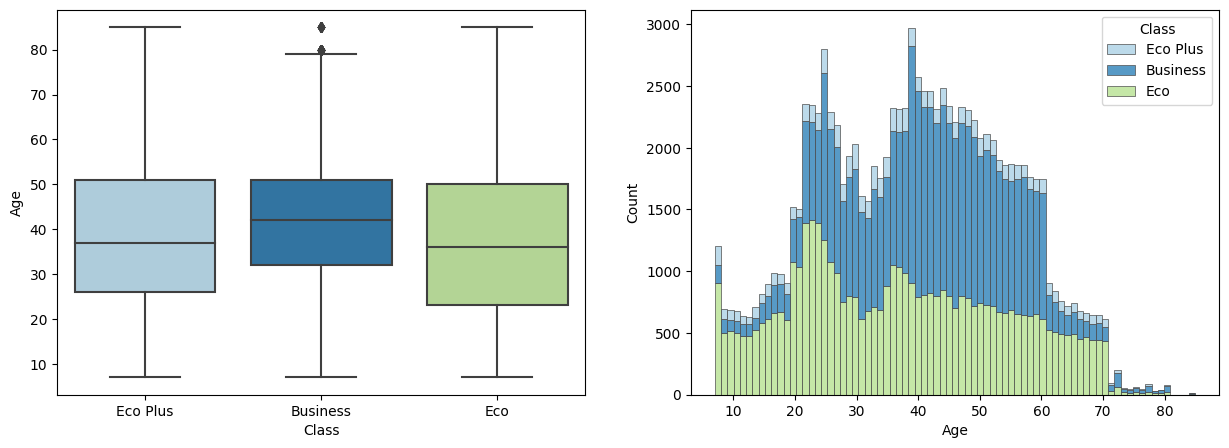

In [22]:
#Plotto la distribuzione delle variabili numeriche nelle variabili categoriche
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = 'Paired', data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Age", hue = "Class", multiple = "stack", palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Chi viaggia in business Class è tendenzialmente più anziana, diciamo sopra i 35 anni fino ai 55. Per le altre due classi il range (della maggior parte dei clienti) invece va dai 25 ai 55.

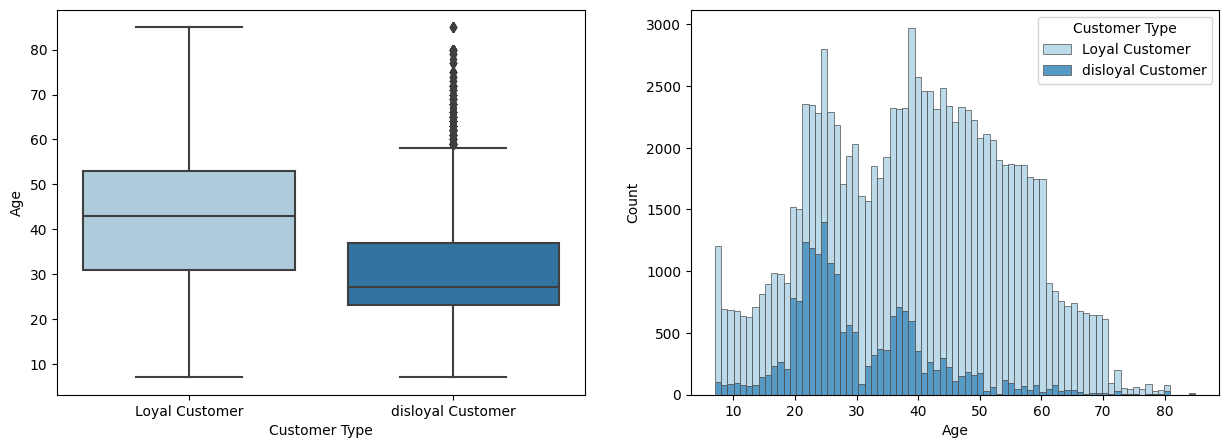

In [23]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = 'Paired', data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Age", hue = "Customer Type", multiple = "stack", palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

I clienti fidelizzati sono anche quelli più anziani.

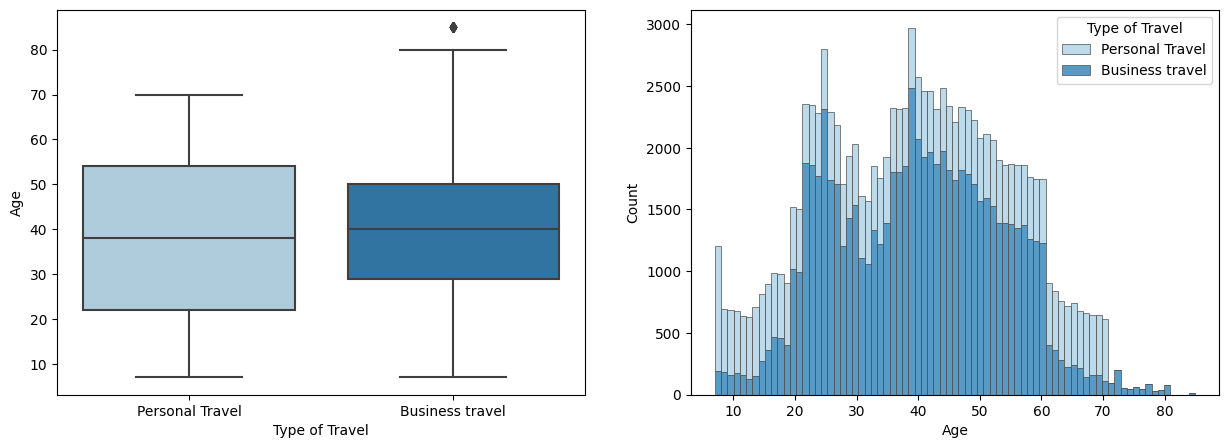

In [24]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Type of Travel", y = "Age", palette = 'Paired', data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Age", hue = "Type of Travel", multiple = "stack", palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Chi viaggia per lavoro ha un range più ristretto, tra i 35 e i 45 circa, rispetto a chi viaggia per motivi personali che ha un range più ampio: 20-55.

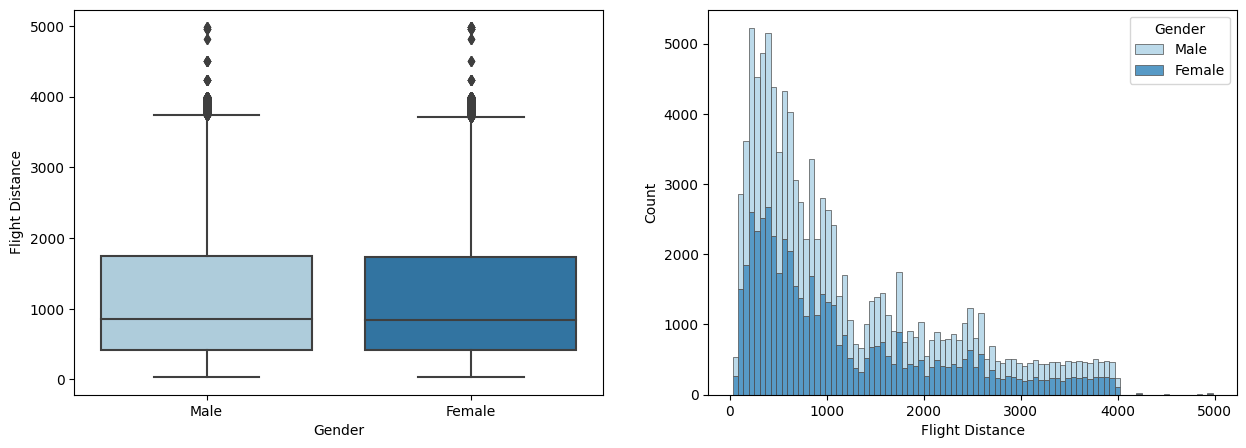

In [25]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Gender", y = "Flight Distance", palette = 'Paired', data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Flight Distance", hue = "Gender", multiple = "stack", palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Anche nella distanza del volo non c'è differenza per quanto riguarda il sesso. Uomini e donne fanno viaggi ugualmente distanti.

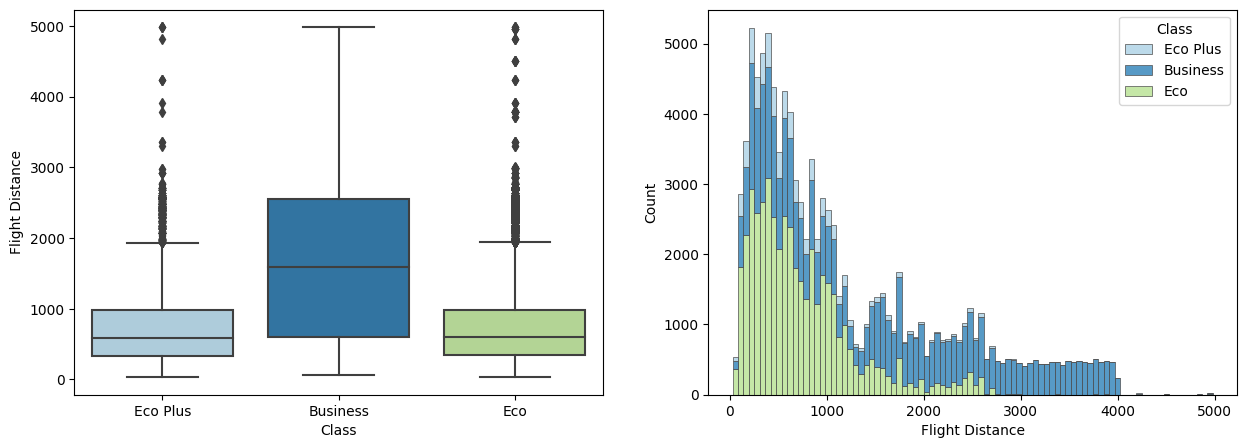

In [26]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = 'Paired', data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Flight Distance", hue = "Class", multiple = "stack", palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

I clienti che fanno viaggi più lunghi sono anche quelli che viaggiano in Business Class. Qui abbiamo una conferma che chi fa voli più lunghi ha anche servizi migliori e come abbiamo visto prima è più soddisfatto.

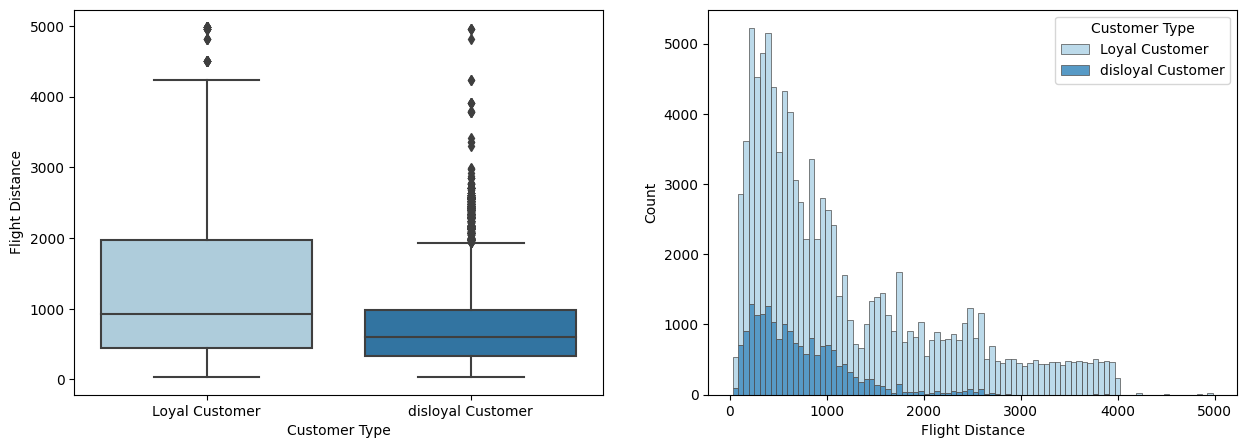

In [27]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Flight Distance", palette = 'Paired', data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Flight Distance", hue = "Customer Type", multiple = "stack", palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

I clienti fidelizzati fanno molti più viaggi lunghi.

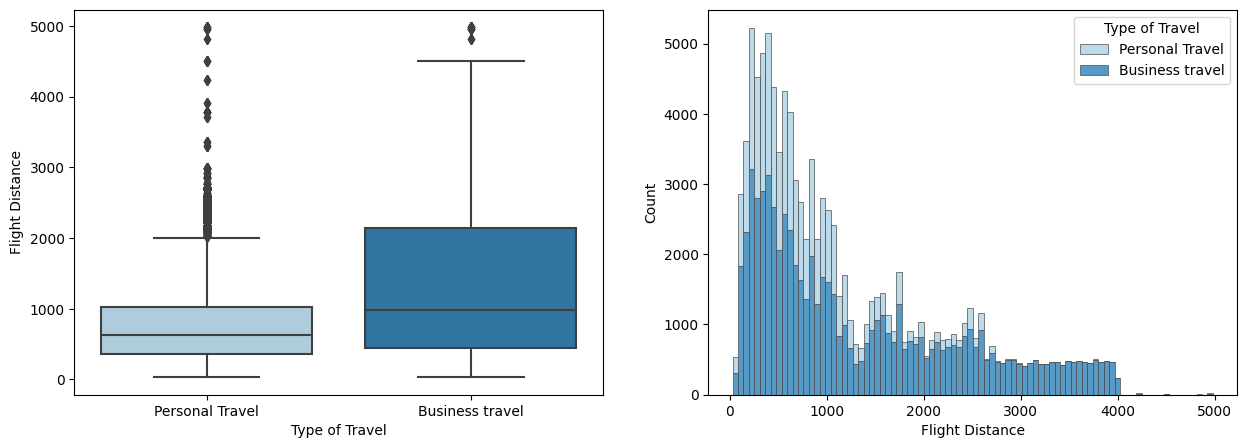

In [28]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Type of Travel", y = "Flight Distance", palette = 'Paired', data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Flight Distance", hue = "Type of Travel", multiple = "stack", palette = 'Paired', edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Da questi grafici si vede che clienti che volano per lavoro sono anche quelli che volano più lontano.

## 3. Preprocessing, Detecting Outliers e Best Feature Selection <a class="anchor" id="third-bullet"></a>

### 3.1. Preprocessing

In [29]:
#Trasformo la variabile "target" in valori 0 e 1 (faccio manualmente per essere sicuro di dare 1 a 'satisfied' e 0 all'altra)
df_train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
df_test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

#Applico LabelEncoder sulle colonne binarie per trasformarle in numeri 0 e 1
le=LabelEncoder()
for col in df_train[['Gender', 'Customer Type', 'Type of Travel']]:
    df_train[col] = le.fit_transform(df_train[col])
    
for col in df_test[['Gender', 'Customer Type', 'Type of Travel']]:
    df_test[col] = le.fit_transform(df_test[col])

#Applico OneHotEncoder tramite "get_dummies" sulla variabile 'Class'
df_train = pd.get_dummies(df_train, columns = ['Class'])
df_test=pd.get_dummies(df_test, columns = ['Class'])

#Trasformo tutte le colonne in tipo numerico
cols = df_train.columns
df_train[cols] = df_train[cols].apply(pd.to_numeric, errors='coerce')
df_test[cols] = df_test[cols].apply(pd.to_numeric, errors='coerce')

Da ora nella colonna "satisfaction" avremo 0 al posto di "neutral or dissatisfied" e 1 al posto di "satisfied". Le variabili binarie avranno anch'esse valori 0 o 1. La variabile "Class" sarà divisa in 3 variabili diverse tramite *OneHotEncoder*.

<AxesSubplot: >

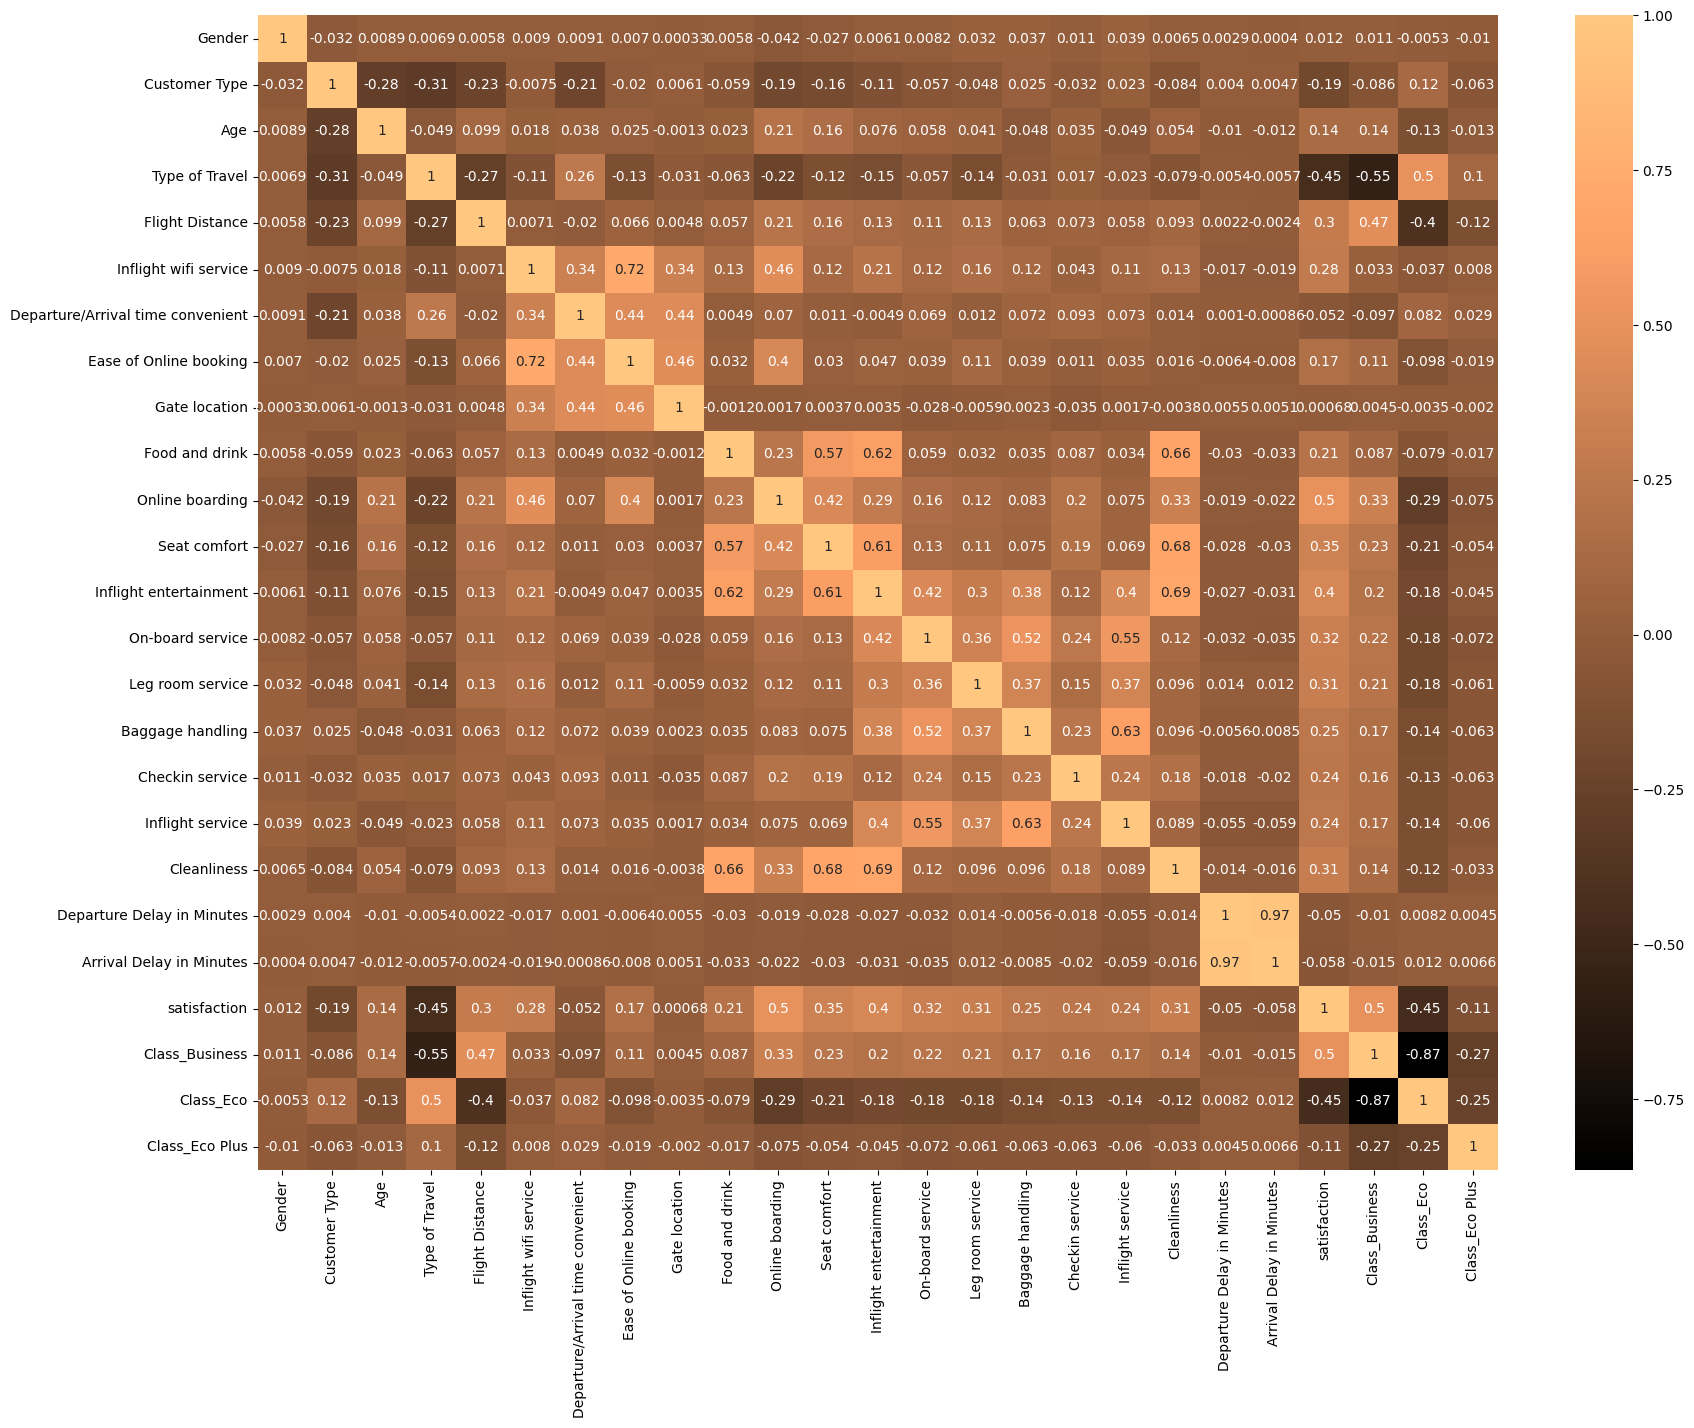

In [30]:
#Plotto la correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),annot = True,cmap='copper')

Ci concentriamo principalmente sul target *satisfaction* ovviamente, le correlazioni più forti ce le ha con *Online boarding* e *Class_Business*, seguite da *Class_Eco* e *Type of Travel*.
<br>Si nota una correlazione altissima tra due variabili (prevedibile), *Departure Delay in Minutes* e *Arrival Delay in Minutes*. Una correlazione così alta tra due variabili non "target" è sempre meglio eliminarla per evitare multicollinearità.
<br>C'è una correlazione abbastanza alta tra *Inflight wifi service* e *Ease of booking online*.
<br>*Cleanliness* trova una buona correlazione con *Food and drink*, *Seat comfort* e *Inflight entertainment*.

<AxesSubplot: >

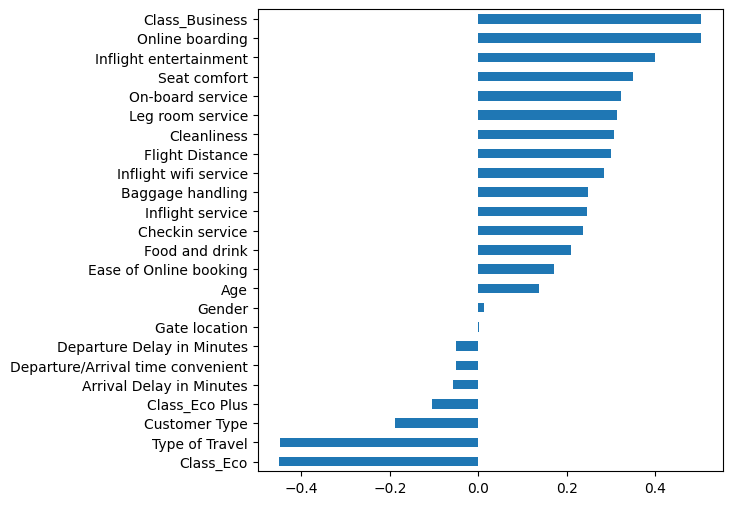

In [31]:
#Plotto solamente le correlazioni con la mia varabile delle classi
df_train.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='barh',figsize=(6,6))

In [32]:
#Elimino "Arrival Delay in Minutes", che tra l'altro era anche l'unica colonna che presentava NaN
df_train.drop(['Arrival Delay in Minutes'],axis=1,inplace=True)
df_test.drop(['Arrival Delay in Minutes'],axis=1,inplace=True)

In [33]:
#Divido i due dataset in X (tutte le features senza target) e y (solo il target)
X_train = df_train.loc[:,df_train.columns!='satisfaction']
y_train = df_train[['satisfaction']]

X_test = df_test.loc[:,df_train.columns!='satisfaction']
y_test = df_test[['satisfaction']]

#Normalizzo i dati
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train = pd.DataFrame(mm_scaler.transform(X_train), columns=X_train.columns)

mm_scaler.fit(X_test)
X_test = pd.DataFrame(mm_scaler.transform(X_test), columns=X_test.columns)

### 3.2. Outliers detection

In [34]:
#Ricerco ed elimino gli outliers dal train tramite EllipticEnvelope
ee = EllipticEnvelope(contamination=0.01)
y_outliers = ee.fit_predict(X_train)
n_outliers = 0
for i in range(len(y_outliers)):
    if y_outliers[i] == -1:
        n_outliers+=1
        X_train.drop(i,inplace = True)
        y_train.drop(i,inplace=True)
print(f"Il numero di outliers rimossi è: {n_outliers}")

Il numero di outliers rimossi è: 1040


### 3.3. Best features selection

Oltre alla Correlation Matrix vista prima userò altre due tecniche per analizzare quali sono le features migliori: *Chi-Square* e *ANOVA (f_classif)*.

#### 3.3.1. Chi-Square

Il test *Chi-square* è un test statistico che viene utilizzato per determinare se la relazione tra due variabili categoriche è statisticamente rilevante. Può essere utilizzato per selezionare le migliori caratteristiche categoriche per un modello di classificazione.

In [35]:
#Applico il chi-square test solo sulle variabili categoriche
X_train_cat = X_train[bin_features+ord_features + ['Class_Eco']+ ['Class_Business'] + ['Class_Eco Plus']]
f_score=chi2(X_train_cat,y_train)
#Creo una series con i risultati del test
p_value=pd.Series(f_score[1],index=X_train_cat.columns)
p_value.sort_values(ascending=True,inplace=True)
p_value_df = pd.DataFrame(p_value,columns=["p_value"])
p_value_df['p_value'] = p_value_df['p_value'].map('{:,.10f}'.format)
print(p_value_df)

                                        p_value
Customer Type                      0.0000000000
Type of Travel                     0.0000000000
Class_Eco                          0.0000000000
Inflight entertainment             0.0000000000
Online boarding                    0.0000000000
Class_Business                     0.0000000000
Seat comfort                       0.0000000000
Inflight wifi service              0.0000000000
On-board service                   0.0000000000
Leg room service                   0.0000000000
Class_Eco Plus                     0.0000000000
Cleanliness                        0.0000000000
Baggage handling                   0.0000000000
Checkin service                    0.0000000000
Food and drink                     0.0000000000
Inflight service                   0.0000000000
Ease of Online booking             0.0000000000
Departure/Arrival time convenient  0.0000000001
Gender                             0.0051558422
Gate location                      0.912

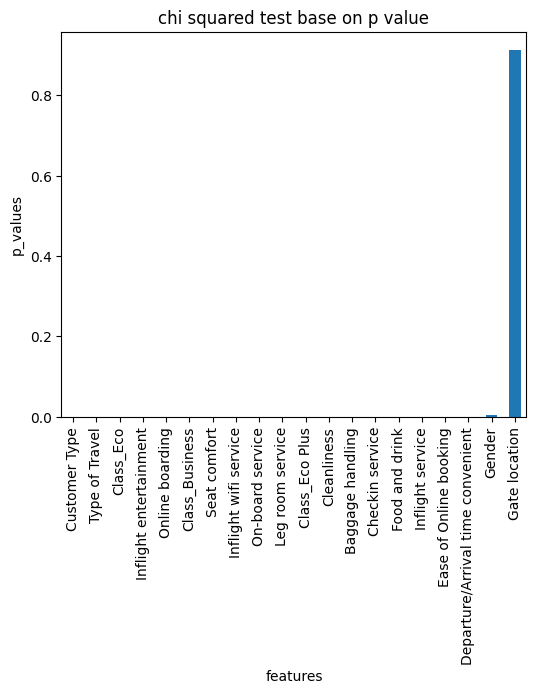

In [36]:
#Plotto graficamente il risultato
plt.figure(figsize=(6,5))
p_value.plot(kind="bar")
plt.xlabel("features",fontsize=10)
plt.ylabel("p_values",fontsize=10)
plt.title("chi squared test base on p value")

plt.show()

Convenzionalmente si usa considerare statisticamente rilevanti le variabili che danno come risultati dal chi-square un p-value <0.05. In questo caso praticamente tutte tranne *Gate location*.

#### 3.3.2. ANOVA (f_classif)

*ANOVA (f_classif)* è un insieme di tecniche statistiche che permettono di confrontare due o più gruppi di dati confrontando la variabilità interna a questi gruppi con la variabilità del target. Qui posso valutare sia le variabili categoriche che quelle numeriche.

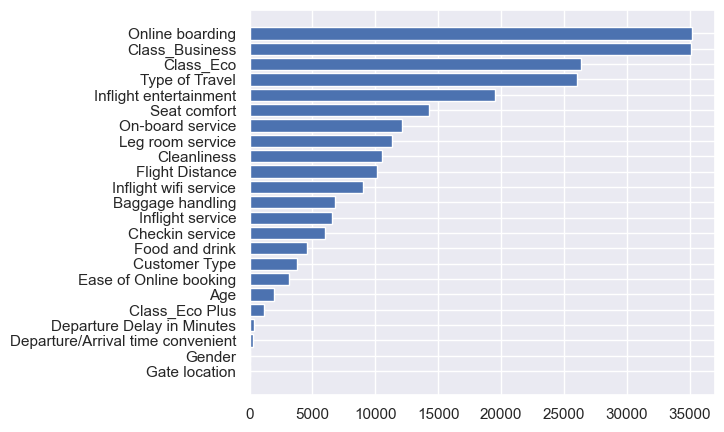

In [37]:
# preparo il "selezionatore"
fs = SelectKBest(score_func=f_classif)
fs.fit(X_train, y_train)

# creo una series con i risultati del test
anova_score = pd.Series(fs.scores_, index=X_train.columns)
anova_score = anova_score.sort_values()

#Mostro graficamente i risultati del test
sns.set()
plt.figure(figsize=(6,5))
plt.barh(y=anova_score.index, width=anova_score)
plt.show()

Le features più rilevanti secondo ANOVA sono: *Online boarding*, *Class_Business*, *Class_Eco*, *Type of Travel*. Il che corrisponde con le altre analisi fatte.
<br> *Gate location* ha ottenuto risultati pessimi su qualsiasi tipo di analisi, dimostrandosi quindi inutile, decido di eliminarla. Anche *Gender* sembra non avere molta influenza ma per ora non voglio fare una vera selezione delle features quindi le tengo tutte tranne *Gate location*.

In [38]:
#Elimino la colonna 'Gate location'
X_train.drop(['Gate location'],axis=1,inplace=True)
X_test.drop(['Gate location'],axis=1,inplace=True)

## 4. Scelta delle metriche<a class="anchor" id="fourth-bullet"></a>

La principale metrica che userò nella valutazione dei modelli è l'*Accuracy*. Perfetta per un problema di classficazione binario con classi bilanciate. Indica quanto un modello è in grado di "azzeccare" le previsioni, ha un valore che può andare da 0 a 1, dove 1 è il risultato migliore. L'Accuracy però da sola non dice tutto, per esempio non distingue tra falsi positivi e falsi negativi, quindi utilizzerò anche altre metriche per vedere da più punti di vista come lavora il modello:
* Classification report (precision, recall, F1-score)
* ROC Curve (AUC)
* Confusion Matrix

La *Precision* è il rapporto tra il numero delle previsioni corrette di un evento (classe) sul totale delle volte che il modello lo prevede. Quando un modello è preciso per una classe, ogni volta che prevede l'evento sbaglia raramente. E' in grado di dire quindi se ci sono falsi positivi (in percentuale) ma non considera i falsi negativi. Va da 0 a 1 con 1 valore migliore.
<br>Il *Recall* misura la sensibilità del modello. E' il rapporto tra le previsioni corrette per una classe sul totale dei casi in cui si verifica effettivamente. Quando un modello è sensibile per una classe, lo prevede ogni volta che si verifica. Prevede quindi la capacità di prevedere i veri positivi. Non considera i falsi positivi. Va da 0 a 1 con 1 valore migliore.
<br>*F1-score* E' la media armonica tra Precision e Recall. Di conseguenza un F1-score alto lo abbiamo se abbiamo valori alti in Precision e Recall. E' più utile in casi in cui le due classi sono sbilanciate ma comunque lo teniamo d'occhio. Va da 0 a 1 con 1 valore migliore.
<br>*ROC Curve (AUC)* è il tracciato grafico di due metriche: il true positive rate e il false positive rate. Più è grande l'area sotto questa curva meglio è. Anche qui valore tra 0 e 1 con 1 valore migliore.
<br>Con la *Confusion Matrix* possiamo vedere numericamente il numero di Veri negativi, Falsi positivi, Falsi negativi, Veri positivi. La diagonale partendo dall'alto a sinistra ci indica i valori "veri" predetti.

Oltre queste metriche per ogni modello analizzerò anche le *Learning Curves* per osservare graficamente come si comporta l'accuracy nei modelli applicati nel train e in un validation set ed individuare se il modello soffre di alto bias (underfitting) o alta varianza (overfitting).

In [39]:
#Preparo questa funzione che mi mostrerà i risultati delle metriche scelte
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) 
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    from matplotlib.pyplot import figure
    plt.rcParams["figure.figsize"] = (3,3)
    plot_confusion_matrix(model, X_test, y_test,cmap='Purples')
    plt.grid(False)
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc

## 5. Machine learning con tutte le features <a class="anchor" id="fifth-bullet"></a>

Seguirò due strade, la prima in cui utilizzerò tutte le features disponibili, e la seconda in cui utilizzerò solo le 4 features che si sono mostrate più rilevanti nelle analisi precedentemente fatte. I modelli che testerò per la predizione sono: *Linear Support Vector Classifier*, *AdaBoost Classifier*, *Random Forest Classifier* e *K-Neighbors Classifier*. Effettuerò uno spot-check sui modelli utilizzando *cross_val_score* e poi selezionerò i due migliori e da lì poi effettuerò un tuning degli iperparametri.

### 5.1. Spot-checking algorithms

In [40]:
#Preparo il selezionatore di fold
seed = 67
kfold = KFold(n_splits=10,shuffle=True, random_state=seed)

#Trasformo le y in array 1d
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#### 5.1.1. Linear Support Vector Classifier

In [41]:
lsvc = LinearSVC()
result = cross_val_score(lsvc,X_train, y_train, cv=kfold, scoring='accuracy',n_jobs=-1)
print(result.mean())

0.874513849940123


#### 5.1.2. AdaBoost

In [42]:
abc = AdaBoostClassifier()
result1 = cross_val_score(abc,X_train, y_train, cv=kfold, scoring='accuracy',n_jobs=-1)
print(result1.mean())

0.9268354241437192


#### 5.1.3. Random Forest

In [43]:
rfc = RandomForestClassifier()
result2 = cross_val_score(rfc,X_train, y_train, cv=kfold, scoring='accuracy')
print(result2.mean())

0.9620372321943348


#### 5.1.4. K-Nearest Neighbors

In [44]:
knc = KNeighborsClassifier()
result3 = cross_val_score(knc,X_train, y_train, cv=kfold, scoring='accuracy')
print(result3.mean())

0.929975477658591


In [45]:
#Creo un Dataframe con i risultati di ogni modello
results=pd.DataFrame(columns=['Accuracy'])
results.loc['Linear Support Vector Regression']=[result.mean()]
results.loc['AdaBoost']=[result1.mean()]
results.loc['Random Forest']=[result2.mean()]
results.loc['K-Nearest neighbors']=[result3.mean()]

results.sort_values('Accuracy',ascending=False).style.background_gradient(cmap='Greens',subset=['Accuracy'])

,Accuracy
Random Forest,0.962037
K-Nearest neighbors,0.929975
AdaBoost,0.926835
Linear Support Vector Regression,0.874514


Dallo spot-check il modello risultato migliore è *Random Forest* con un Accuracy del 96%, al secondo posto di pochissimo avanti a *AdaBoost* abbiamo *KNN* con 92% di Accuracy. Su questi due modelli effettueremo adesso un tuning degli iperaparametri per "potenziare" i nostri modelli.

### 5.2. Hyperparameters Tuning

#### 5.2.1. Random Forest

In [45]:
#Preparo i parametri da incrociare
param_grid = {'n_estimators' : [100, 300, 500, 800, 1200],
'max_depth' : [5, 8, 15, 25],
'min_samples_split' : [2, 5, 10],
'min_samples_leaf' : [1, 2, 5]}

#Tramite GridSearchCV applico 3 cross validation usando gli iperparametri selezionati precedentemente
#Con RandomizedSearchCV sarebbe un processo più veloce ma avendo tempo preferisco questo per essere più preciso
search_rfc = GridSearchCV(rfc, param_grid, cv = 3, verbose = 10, 
                      n_jobs = -1,scoring='accuracy')
results = search_rfc.fit(X_train, y_train)

#printing
print('Best Score: %s' % results.best_score_)
print('Best Hyperparameters: %s' % results.best_params_)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best Score: 0.9613081350132213
Best Hyperparameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [52]:
#Applico il modello con i migliori iperparametri
model_rfc = RandomForestClassifier(max_depth=25,min_samples_leaf=1,min_samples_split=5,n_estimators=300,
                                   random_state=seed)
start = time.time()
model_rfc.fit(X_train,y_train)
stop = time.time()
run_time=stop-start
print("Run time: {:.2f}s" .format(run_time))
y_train_pred = model_rfc.predict(X_train)
acc_train_rfc = accuracy_score(y_train, y_train_pred)
print(f"L'accuracy di Random Forest sul train è {acc_train_rfc}")

y_test_pred = model_rfc.predict(X_test)
acc_test_rfc = accuracy_score(y_test, y_test_pred)
print(f"L'accuracy di Random Forest sul test è {acc_test_rfc}")

Run time: 17.88s
L'accuracy di Random Forest sul train è 0.9941378908072795
L'accuracy di Random Forest sul test è 0.960117031105636


Accuracy = 0.960117031105636
ROC Area under Curve = 0.9926107073311867
              precision    recall  f1-score   support

           0    0.95132   0.97900   0.96496     14573
           1    0.97213   0.93598   0.95371     11403

    accuracy                        0.96012     25976
   macro avg    0.96173   0.95749   0.95934     25976
weighted avg    0.96046   0.96012   0.96003     25976



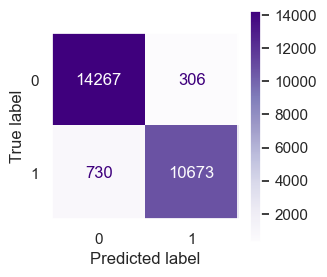

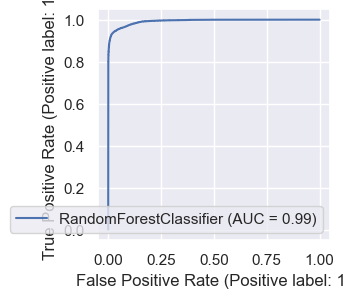

In [47]:
#Mostro i risultati di tutte le varie metriche
model_lr, accuracy_lr, roc_auc_lr = run_model(model_rfc, X_train, y_train, X_test, y_test)

[learning_curve] Training set sizes: [  685  2071  3456  4842  6227  7613  8998 10384 11769 13155 14540 15926
 17311 18697 20082 21468 22854 24239 25625 27010 28396 29781 31167 32552
 33938 35323 36709 38094 39480 40865 42251 43636 45022 46407 47793 49178
 50564 51949 53335 54720 56106 57491 58877 60262 61648 63033 64419 65804
 67190 68576]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of 150 | elapsed:    8.7s remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  23 out of 150 | elapsed:   26.9s remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  39 out of 150 | elapsed:  1.1min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  55 out of 150 | elapsed:  1.5min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  71 out of 150 | elapsed:  1.8min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  87 out of 150 | elapsed:  2.4min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done 103 out of 150 | elapsed:  2.8min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done 119 out of 150 | elapsed:  3.1min remaining:   49.0s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:  3.8min remaining:   24.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.4min finished


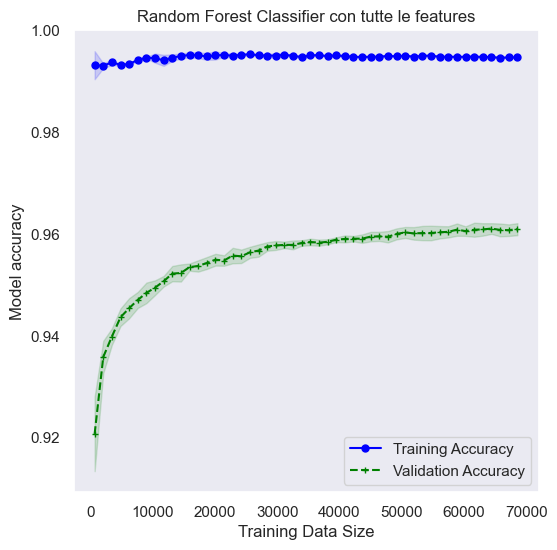

In [48]:
#Creo i dati per la learning curve effettuando 3 cross validation
train_sizes, train_scores, test_scores = learning_curve(model_rfc, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1,
                                                         train_sizes=np.linspace(0.01, 1.0, 50),verbose=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plotto le learning curves
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Random Forest Classifier con tutte le features')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#### 5.2.2. K-Nearest Neighbors

In [46]:
#L'unico parametro che valuterò per KNN è 'n_neighbors'
param_grid = { 'n_neighbors' : [3,5,7,9,11,13,15]}

#Applico GridSearchCV con 3 cross validation
search_knc = GridSearchCV(knc, param_grid, cv = 3, verbose = 10, 
                      n_jobs = -1,scoring='accuracy')
results = search_knc.fit(X_train, y_train)

print('Best Score: %s' % results.best_score_)
print('Best Hyperparameters: %s' % results.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Score: 0.9286339244050397
Best Hyperparameters: {'n_neighbors': 7}


In [51]:
#Applico il modello con i migliori iperparametri
model_knc = KNeighborsClassifier(n_neighbors=7)
start = time.time()
model_knc.fit(X_train,y_train)
stop = time.time()
run_time=stop-start
print("Run time: {:.2f}s" .format(run_time))
y_train_pred = model_knc.predict(X_train)
acc_train_knc = accuracy_score(y_train, y_train_pred)
print(f"L'accuracy di K-Nearest Neighbors sul train è {acc_train_knc}")

y_test_pred = model_knc.predict(X_test)
acc_test_knc = accuracy_score(y_test, y_test_pred)
print(f"L'accuracy di K-Nearest Neighbors sul test è {acc_test_knc}")

Run time: 0.01s
L'accuracy di K-Nearest Neighbors sul train è 0.9445675843832634
L'accuracy di K-Nearest Neighbors sul test è 0.9284339390206344


Accuracy = 0.9284339390206344
ROC Area under Curve = 0.975347312506814
              precision    recall  f1-score   support

           0    0.90949   0.96885   0.93823     14573
           1    0.95656   0.87679   0.91494     11403

    accuracy                        0.92843     25976
   macro avg    0.93303   0.92282   0.92659     25976
weighted avg    0.93016   0.92843   0.92801     25976



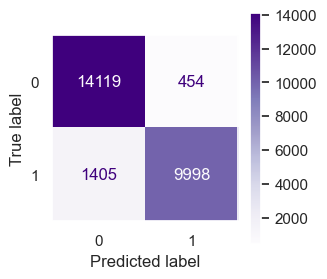

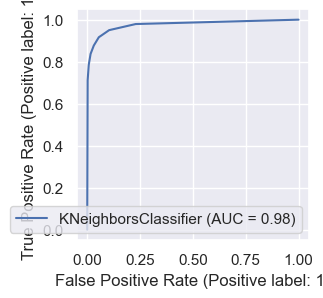

In [56]:
#Mostro i risultati di tutte le varie metriche
model_lr, accuracy_lr, roc_auc_lr = run_model(model_knc, X_train, y_train, X_test, y_test)

[learning_curve] Training set sizes: [  685  2071  3456  4842  6227  7613  8998 10384 11769 13155 14540 15926
 17311 18697 20082 21468 22854 24239 25625 27010 28396 29781 31167 32552
 33938 35323 36709 38094 39480 40865 42251 43636 45022 46407 47793 49178
 50564 51949 53335 54720 56106 57491 58877 60262 61648 63033 64419 65804
 67190 68576]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of 150 | elapsed:    7.0s remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  23 out of 150 | elapsed:   36.4s remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  39 out of 150 | elapsed:  1.9min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  55 out of 150 | elapsed:  2.4min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  71 out of 150 | elapsed:  3.1min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  87 out of 150 | elapsed:  4.2min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done 103 out of 150 | elapsed:  4.9min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done 119 out of 150 | elapsed:  5.5min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:  6.5min remaining:   43.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.8min finished


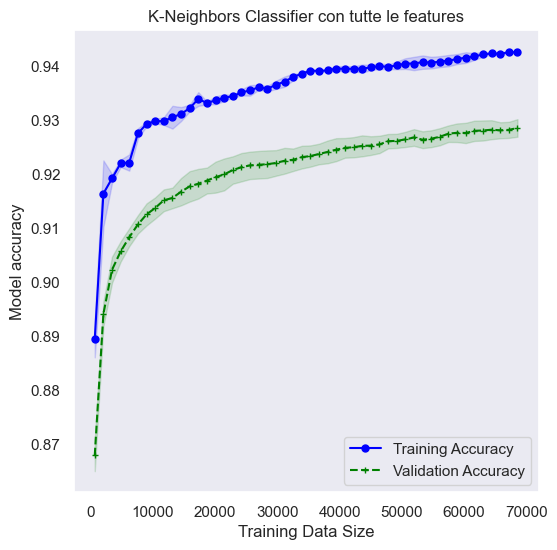

In [57]:
#Creo i dati per la learning curve effettuando 3 cross validation
train_sizes, train_scores, test_scores = learning_curve(model_knc, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1,
                                                         train_sizes=np.linspace(0.01, 1.0, 50),verbose=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plotto le learning curves
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('K-Neighbors Classifier con tutte le features')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 5.3. Valutazioni parziali

In [54]:
#Creo un DataFrame che mostra l'Accuracy sul train e sul test dei due modelli
results=pd.DataFrame(columns=['Accuracy test','Accuracy train'])
results.loc['Random Forest']=[acc_test_rfc,acc_train_rfc]
results.loc['K-Nearest Neighbors']=[acc_test_knc,acc_train_knc]
results.sort_values('Accuracy test',ascending=False).style.background_gradient(cmap='Greens',subset=['Accuracy test'])

,Accuracy test,Accuracy train
Random Forest,0.960117,0.994138
K-Nearest Neighbors,0.928434,0.944568


Come si vede dalla tabella precedente il risultato migliore sul Test ce l'ha Random Forest con un 96% di Accuracy. Sul Train ottiene un "preoccupante" 99% ma vedendo anche le Learning Curves si può notare che non c'è un problema di overfitting. Simile discorso per KNN che ottiene un Accuracy del 92% sul Test e 94% sul Train. La Confusion Matrix mostra che la maggior parte di veri positivi e veri negativi sono predetti bene. Random Forest ottiene più falsi negativi rispetto ai falsi positivi (il doppio circa). E ha un valore molto alto di AUC (0.99). KNN anche ottiene più falsi negativi rispetto ai falsi positivi ma questa volta sono più del triplo. Il valore di AUC è anche qui ottimo: 0.98. Entrambi i modelli sono più precisi sulla classe 1 ma più sensibili sulla classe 0. Su tutti i valori è più alto il valore di Random Forest ma il distacco tra le due classi in Precision e Recall è più evidente in KNN.

## 6. Machine Learning con "best features"<a class="anchor" id="sixth-bullet"></a>

Proviamo adesso lo stesso percorso ma utilizzando solo le features che dalle analisi sono risultate essere le più influenti. Ho selezionato: *Online boarding*, *Class_Business*, *Type of Travel*, *Class_Eco*.

### 6.1. Spot-checking algorithms

In [55]:
best_features = ['Online boarding', 'Class_Business', 'Type of Travel', 'Class_Eco']
X_train_bf = X_train[best_features]
X_test_bf = X_test[best_features]

#### 6.1.1. Linear Support Vector Classifier

In [59]:
lsvc = LinearSVC()
result = cross_val_score(lsvc,X_train_bf, y_train, cv=kfold, scoring='accuracy',n_jobs=-1)
print(result.mean())

0.8136567655856162


#### 6.1.2. AdaBoost

In [60]:
abc = AdaBoostClassifier()
result1 = cross_val_score(abc,X_train_bf, y_train, cv=kfold, scoring='accuracy',n_jobs=-1)
print(result1.mean())

0.8382038187283755


#### 6.1.3. Random Forest

In [61]:
rfc = RandomForestClassifier()
result2 = cross_val_score(rfc,X_train_bf, y_train, cv=kfold, scoring='accuracy',n_jobs=-1)
print(result2.mean())

0.8502001746832655


#### 6.1.4. K-Nearest Neighbors

In [62]:
knc = KNeighborsClassifier()
result3 = cross_val_score(knc,X_train_bf, y_train, cv=kfold, scoring='accuracy',n_jobs=-1)
print(result3.mean())

0.844620230608448


In [63]:
#Creo un Dataframe con i risultati di ogni modello
results=pd.DataFrame(columns=['Accuracy'])
results.loc['Linear Support Vector Classifier']=[result.mean()]
results.loc['AdaBoost']=[result1.mean()]
results.loc['Random Forest']=[result2.mean()]
results.loc['K-Nearest Neighbors']=[result3.mean()]
results.sort_values('Accuracy',ascending=False).style.background_gradient(cmap='Greens',subset=['Accuracy'])

,Accuracy
Random Forest,0.850200
K-Nearest Neighbors,0.844620
AdaBoost,0.838204
Linear Support Vector Classifier,0.813657


Anche in questo spot-check i migliori due algoritmi sono **Random Forest** e **K-Nearest Neighbors** (veramente di pochissimo sul terzo AdaBoost) con rispettivamente 85% e 83% di Accuracy. Più bassa di prima ma comunque andiamo avanti col tuning degli iperparametri.

### 6.2. Hyperparameters Tuning

#### 6.2.1. Random Forest

In [64]:
#Preparo i parametri da incrociare
param_grid = {'n_estimators' : [100, 300, 500, 800, 1200],
'max_depth' : [5, 8, 15, 25],
'min_samples_split' : [2, 5, 10],
'min_samples_leaf' : [1, 2, 5]}

#Applico GridSearchCV con 3 cross validation
search_rfc = GridSearchCV(rfc, param_grid, cv = 3, verbose = 10, 
                      n_jobs = -1,scoring='accuracy')
results = search_rfc.fit(X_train_bf, y_train)

#printing
print('Best Score: %s' % results.best_score_)
print('Best Hyperparameters: %s' % results.best_params_)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best Score: 0.8505113547985691
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [56]:
#Applico il modello con i migliori iperparametri trovati
model_rfc2 = RandomForestClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=2,n_estimators=300,
                                   random_state=seed)
start = time.time()
model_rfc2.fit(X_train_bf,y_train)
stop = time.time()
run_time=stop-start
print("Run time: {:.2f}s" .format(run_time))

y_train_pred = model_rfc2.predict(X_train_bf)
acc_train_rfc = accuracy_score(y_train, y_train_pred)
print(f"L'accuracy di Random Forest sul train è {acc_train_rfc}")

y_test_pred = model_rfc2.predict(X_test_bf)
acc_test_rfc = accuracy_score(y_test, y_test_pred)
print(f"L'accuracy di Random Forest sul test è {acc_test_rfc}")

Run time: 3.31s
L'accuracy di Random Forest sul train è 0.8505502410950381
L'accuracy di Random Forest sul test è 0.8475515860794579


Accuracy = 0.8475515860794579
ROC Area under Curve = 0.9191206037500537
              precision    recall  f1-score   support

           0    0.82163   0.93021   0.87255     14573
           1    0.89269   0.74191   0.81034     11403

    accuracy                        0.84755     25976
   macro avg    0.85716   0.83606   0.84145     25976
weighted avg    0.85282   0.84755   0.84525     25976



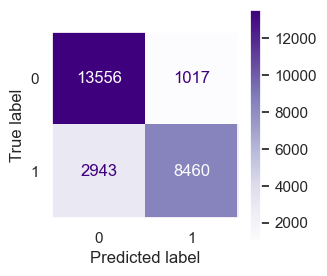

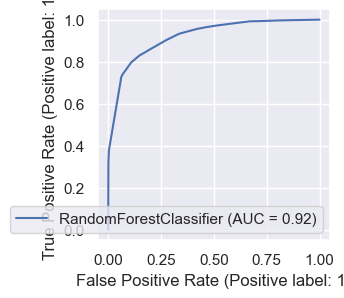

In [67]:
#Mostro i risultati di tutte le varie metriche
model_lr, accuracy_lr, roc_auc_lr = run_model(model_rfc2, X_train_bf, y_train, X_test_bf, y_test)

[learning_curve] Training set sizes: [  685  2071  3456  4842  6227  7613  8998 10384 11769 13155 14540 15926
 17311 18697 20082 21468 22854 24239 25625 27010 28396 29781 31167 32552
 33938 35323 36709 38094 39480 40865 42251 43636 45022 46407 47793 49178
 50564 51949 53335 54720 56106 57491 58877 60262 61648 63033 64419 65804
 67190 68576]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of 150 | elapsed:    5.9s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  23 out of 150 | elapsed:   11.4s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  39 out of 150 | elapsed:   23.8s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  55 out of 150 | elapsed:   29.4s remaining:   50.9s
[Parallel(n_jobs=-1)]: Done  71 out of 150 | elapsed:   36.4s remaining:   40.5s
[Parallel(n_jobs=-1)]: Done  87 out of 150 | elapsed:   47.7s remaining:   34.5s
[Parallel(n_jobs=-1)]: Done 103 out of 150 | elapsed:   55.1s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done 119 out of 150 | elapsed:  1.0min remaining:   15.8s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:  1.2min remaining:    8.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.4min finished


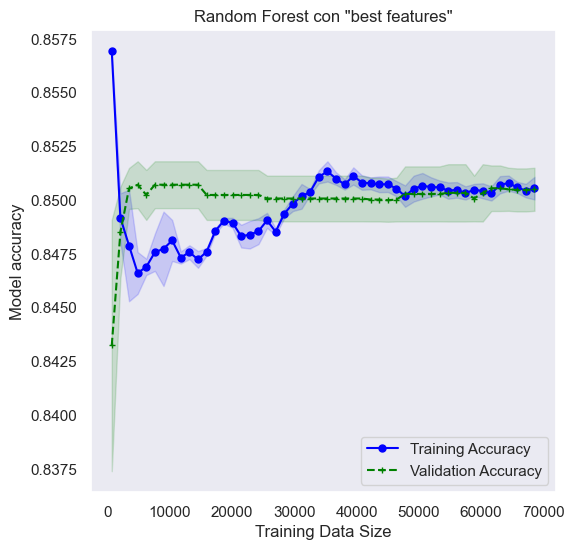

In [68]:
#Creo i dati per la learning curve effettuando 3 cross validation
train_sizes, train_scores, test_scores = learning_curve(model_rfc2, X_train_bf, y_train, cv=3, scoring='accuracy', n_jobs=-1,
                                                         train_sizes=np.linspace(0.01, 1.0, 50),verbose=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plotto le learning curves
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Random Forest con "best features"')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#### 6.2.2. K-Nearest Neighbors

In [69]:
#L'unico parametro che valuterò per KNN è 'n_neighbors'
param_grid = { 'n_neighbors' : [3,5,7,9,11,13,15]}

#Applico GridSearchCV con 3 cross validation
search_knc = GridSearchCV(knc, param_grid, cv = 3, verbose = 10, 
                      n_jobs = -1,scoring='accuracy')
results = search_knc.fit(X_train_bf, y_train)

print('Best Score: %s' % results.best_score_)
print('Best Hyperparameters: %s' % results.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Score: 0.8344804790791724
Best Hyperparameters: {'n_neighbors': 15}


In [57]:
#Applico il modello col miglior iperaprametro trovato
model_knc2 = KNeighborsClassifier(n_neighbors=15)
start = time.time()
model_knc2.fit(X_train_bf,y_train)
stop = time.time()
run_time=stop-start
print("Run time: {:.2f}s" .format(run_time))
y_train_pred = model_knc2.predict(X_train_bf)
acc_train_knc = accuracy_score(y_train, y_train_pred)
print(f"L'accuracy di K-Nearest Neighbors sul train è {acc_train_knc}")

y_test_pred = model_knc2.predict(X_test_bf)
acc_test_knc = accuracy_score(y_test, y_test_pred)
print(f"L'accuracy di K-Nearest Neighbors sul test è {acc_test_knc}")

Run time: 0.06s
L'accuracy di K-Nearest Neighbors sul train è 0.8441242806035153
L'accuracy di K-Nearest Neighbors sul test è 0.8428164459501077


Accuracy = 0.8428164459501077
ROC Area under Curve = 0.9010774148328916
              precision    recall  f1-score   support

           0    0.83050   0.90441   0.86588     14573
           1    0.86216   0.76410   0.81017     11403

    accuracy                        0.84282     25976
   macro avg    0.84633   0.83425   0.83803     25976
weighted avg    0.84440   0.84282   0.84143     25976



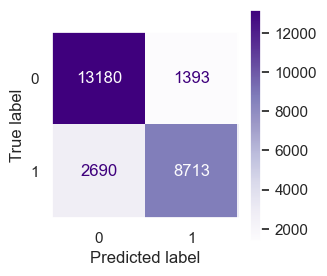

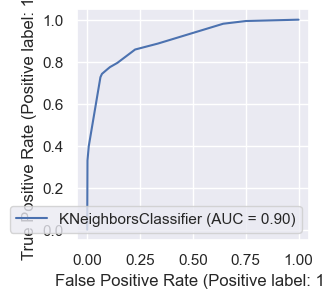

In [71]:
#Mostro graficamente le varie metriche
model_lr, accuracy_lr, roc_auc_lr = run_model(model_knc2, X_train_bf, y_train, X_test_bf, y_test)

[learning_curve] Training set sizes: [  685  2071  3456  4842  6227  7613  8998 10384 11769 13155 14540 15926
 17311 18697 20082 21468 22854 24239 25625 27010 28396 29781 31167 32552
 33938 35323 36709 38094 39480 40865 42251 43636 45022 46407 47793 49178
 50564 51949 53335 54720 56106 57491 58877 60262 61648 63033 64419 65804
 67190 68576]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of 150 | elapsed:    4.5s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  23 out of 150 | elapsed:   17.6s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  39 out of 150 | elapsed:   48.6s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  55 out of 150 | elapsed:  1.1min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  71 out of 150 | elapsed:  1.3min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  87 out of 150 | elapsed:  1.8min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done 103 out of 150 | elapsed:  2.1min remaining:   57.6s
[Parallel(n_jobs=-1)]: Done 119 out of 150 | elapsed:  2.3min remaining:   36.3s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:  2.7min remaining:   18.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.2min finished


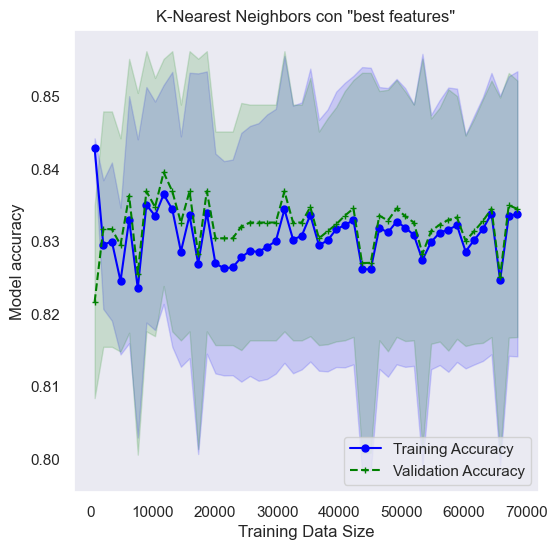

In [72]:
#Creo i dati per la learning curve effettuando 3 cross validation
train_sizes, train_scores, test_scores = learning_curve(model_knc2, X_train_bf, y_train, cv=3, scoring='accuracy', n_jobs=-1,
                                                         train_sizes=np.linspace(0.01, 1.0, 50),verbose=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plotto le learning curves
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('K-Nearest Neighbors con "best features"')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### 6.3. Valutazioni parziali

In [73]:
#Creo un DataFrame che mostra l'Accuracy sul train e sul test dei due modelli
results=pd.DataFrame(columns=['Accuracy test','Accuracy train'])
results.loc['Random Forest']=[acc_test_rfc,acc_train_rfc]
results.loc['KNN']=[acc_test_knc,acc_train_knc]
results.sort_values('Accuracy test',ascending=False).style.background_gradient(cmap='Greens',subset=['Accuracy test'])

,Accuracy test,Accuracy train
Random Forest,0.847552,0.850560
K-Nearest Neighbors,0.842816,0.844134


Con la selezione di feature entrambi i modelli hanno diminuito la loro Accuracy ma entrambe hanno avvicinato il divario test/train che ora è praticamente perfetto per entrambi (leggermente più vicino KNN). L'accuracy migliore sul test rimane comunque di poco quella di Random Forest anche in questo caso. Si sono abbassate un po' tutte le metriche in maniera "regolare" ed è aumentato il distacco precisione/recall sulle due classi. Le due AUC sono diminuite da 0.99 (Random Forest) a 0.92 e da 0.98 (KNN) a 0.91. L'ottimo risultato si ha dalle learning curves, che si dimostrano molto precise, soprattutto quella di Random Forest garantisce un modello molto solido.

## 7. Valutazioni finali <a class="anchor" id="seventh-bullet"></a>

E' ora di trarre le conclusioni, divido in valutazioni sulla EDA e sul Machine Learning.

### 7.1. Valutazioni exploratory data analysis (EDA)

Partendo dalla fase di EDA dal dataset dai dati raccolti possiamo ricavare una sorta di identikit del cliente "ideale" più portato ad essere soddisfatto:
* Cliente fidelizzato
* Voli lunghi
* Viaggia in Business Class
* Tra i 35 e i 45 anni
* Viaggia per lavoro

Abbiamo poi visto in generale le variabili più rilevanti nella soddisfazione di un cliente e sono: *Online boarding*, *Class* e *Type of Travel*. Quindi il cliente più soddisfatto è particolarmente attento ad un buon servizio di check-in online, vola in Business Class e viaggia per lavoro. Variabili come *Gate Location* (la posizione del gate in aeroporto) e *Gender* (il sesso del cliente) si rivelano invece molto poco influenti (soprattutto il primo).

### 7.2. Valutazioni Machine Learning

In [60]:
#Creo due funzioni che mi permettono di ricavarmi le metriche di ogni modello
def mod (model):
    start = time.time()
    model.fit(X_train,y_train.ravel())
    stop = time.time()
    run_time=stop-start
    y_test_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    y_train_pred = model.predict(X_train)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracy_train = accuracy_score(y_train,y_train_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score (y_test,y_test_pred)
    precision = precision_score(y_test,y_test_pred)
    recall = recall_score (y_test, y_test_pred)
    
    return (accuracy_test,accuracy_train,auc,f1,precision,recall,run_time)

#Ne creo due separate perchè su una va usata la X solo con le best features
def mod2 (model2):
    start = time.time()
    model2.fit(X_train_bf,y_train.ravel())
    stop = time.time()
    run_time=stop-start
    y_test_pred = model2.predict(X_test_bf)
    y_pred_proba = model2.predict_proba(X_test_bf)[:,1]
    y_train_pred = model2.predict(X_train_bf)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracy_train = accuracy_score(y_train,y_train_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score (y_test,y_test_pred)
    precision = precision_score(y_test,y_test_pred)
    recall = recall_score (y_test, y_test_pred)
    
    return (accuracy_test,accuracy_train,auc,f1,precision,recall,run_time)

In [61]:
#Creo due dataframe separati con tutte le metriche ottenute in base al modello
models = []
models.append(('Random Forest (all features)', model_rfc))
models.append(('KNN (all features)', model_knc))

model_name = []
model_metrics = []

for i in models:
    model_name.append(i[0])
    model_metrics.append(mod(i[1]))
    
final = pd.DataFrame(model_metrics, 
                      columns = ['Accuracy test','Accuracy train', 'Auc','F1','Precision','Recall','Run Time'], 
                      index = model_name)

models2 = []
models2.append(('Random Forest (best features)', model_rfc2))
models2.append(('KNN (best features)', model_knc2))

model_name2 = []
model_metrics2 = []

for i in models2:
    model_name2.append(i[0])
    model_metrics2.append(mod2(i[1]))
    
final2 = pd.DataFrame(model_metrics2, 
                      columns = ['Accuracy test','Accuracy train', 'Auc','F1','Precision','Recall','Run Time'], 
                      index = model_name2)

#Unisco in un unico Dataframe
frames = [final,final2]
final_d = pd.concat(frames)
final_d

,Accuracy test,Accuracy train,Auc,F1,Precision,Recall,Run Time
Random Forest (all features),0.960117,0.994138,0.992611,0.953713,0.972129,0.935982,18.998921
KNN (all features),0.928434,0.944568,0.975345,0.914939,0.956563,0.876787,0.009486
Random Forest (best features),0.847552,0.850550,0.919151,0.810345,0.892688,0.741910,3.539144
KNN (best features),0.842816,0.844124,0.904356,0.810172,0.862161,0.764097,0.063507


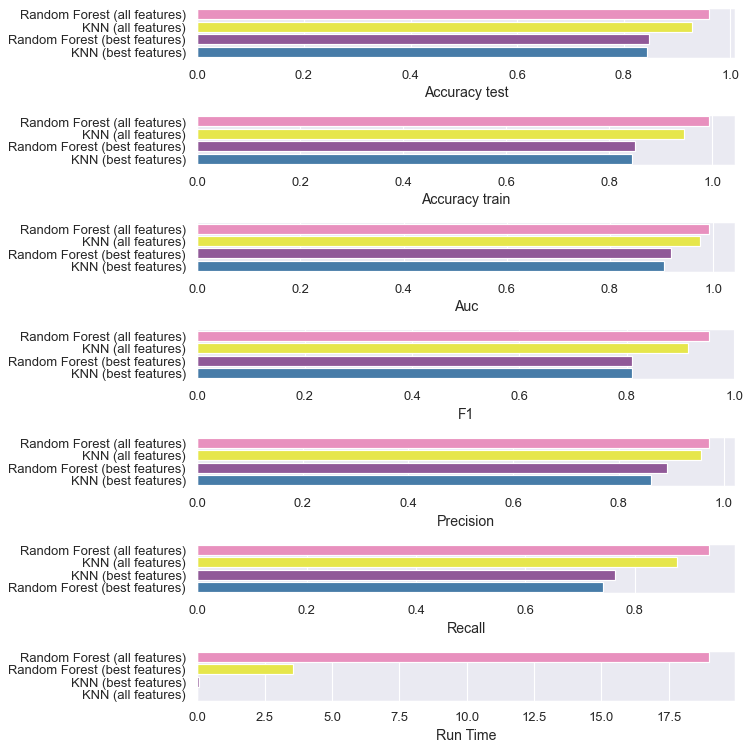

In [62]:
#Plotto graficamente i risultati di ogni modello in base alla metrica
fig,ax=plt.subplots(7,1,figsize=(9,9),dpi=85)
axi=0
for col in final_d.columns:
    final_d.sort_values(col,ascending=False,inplace=True)
    sns.barplot(x=final_d[col],y=final_d.index,ax=ax[axi],palette='Set1_r')
    axi+=1
plt.tight_layout()

Passiamo alla valutazione del modello, la prima cosa che si nota è che utilizzando solo le "best features" il risultato sull'Accuracy e sulle altre metriche cala su entrambi i modelli, quindi probabilmente il modello ha bisogno di più informazioni per avere più accuratezza, noi abbiamo preso quelle "migliori" ma sicuramente molte altre sono influenti. La cosa ottima dei modelli "best features" è che non fanno molta differenza tra train e test, il che garantisce un modello più robusto e più adatto a valutare dati nuovi magari anche molto diversi da questi. Ritengo comunque che i risultati del *Random Forest (all features)* siano veramente ottimi su tutte le metriche in confronto agli altri modelli, nonostante una differenza di 3% con l'Accuracy Train che considero accettabile specialmente con dei valori così alti. Il tempo impiegato per *Random Forest (all features)* è circa 5 volte di più di *Random Forest (best features)* ma parliamo di secondi quindi cambia veramente poco.